#**Problem Statement**
Many telecom companies face a significant challenge: customer churn — when users leave the service and stop subscribing. This directly impacts company revenue and long-term success.
In this project, we aim to build a predictive model that can help identify customers who are likely to churn, based on their service usage, demographic information, contract type, and billing method. This allows the company to take proactive retention actions before losing the customer.

#**📊Dataset Overview**

The dataset is provided by a telecom company and contains information about 7,043 customers. Each row represents a customer, and each column represents a feature related to customer demographics, services they use, billing information, and whether they left the service (churned) or not.

#**🔍Main Columns:**

- **CustomerID**: Unique ID for each customer
- **gender**: Male or Female
- **SeniorCitizen**: Whether the customer is a senior citizen (1) or not (0)
- **Partner**: Whether the customer has a partner
- **Dependents**: Whether the customer has dependents
- **tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has phone service
- **MultipleLines**: Whether the customer has multiple lines
- **InternetService**: Type of internet service (DSL, Fiber optic, No)
- **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies**: Whether the customer has these internet services
- **Contract**: Type of contract (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer is enrolled in paperless billing
- **PaymentMethod**: Payment method used by the customer
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn** (Target): Whether the customer left the company (Yes) or stayed (No)

#**📈Objective:**

The goal is to use these features to predict whether a customer will churn or not using machine learning models.

#**Importing Required Libraries**

In [79]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib

#**Data Cleaning**

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [15]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
# Replacing empty strings in 'TotalCharges' with NaN and converting the column to float
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges']=df["TotalCharges"].astype(float)

In [18]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [19]:
df.dropna(inplace=True)

#**📊 Exploratory Data Analysis (EDA)**

In this section, we explore the dataset to understand distributions, relationships, and possible patterns in the data.

We'll start by analyzing the categorical and numerical features separately, then move on to bivariate relationships with the target variable **Churn**.

The objectives of EDA are:
- Understand feature distributions
- Detect class imbalance
- Discover correlations and trends

In [109]:
df['gender'].value_counts()

,count
gender,
1,3549
0,3483


In [110]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [111]:
pd.crosstab(df.PaymentMethod,df.Churn)

Churn,0,1
PaymentMethod,,
0,1284,258
1,1289,232
2,1294,1071
3,1296,308


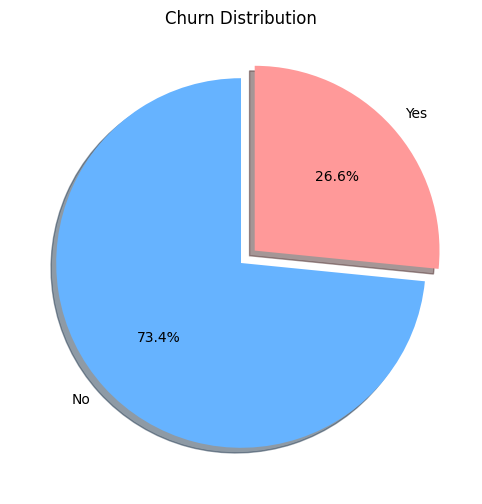

In [20]:
churn_counts=df['Churn'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff','#ff9999'],
    explode=(0,0.1),
    shadow=True)
plt.title('Churn Distribution')
plt.show()

##Churn Distribution
This pie chart visualizes the proportion of customers who have churned versus those who have stayed.

No (Not Churned): 73.4% of customers are still with the company.

Yes (Churned): 26.6% of customers have left the company.

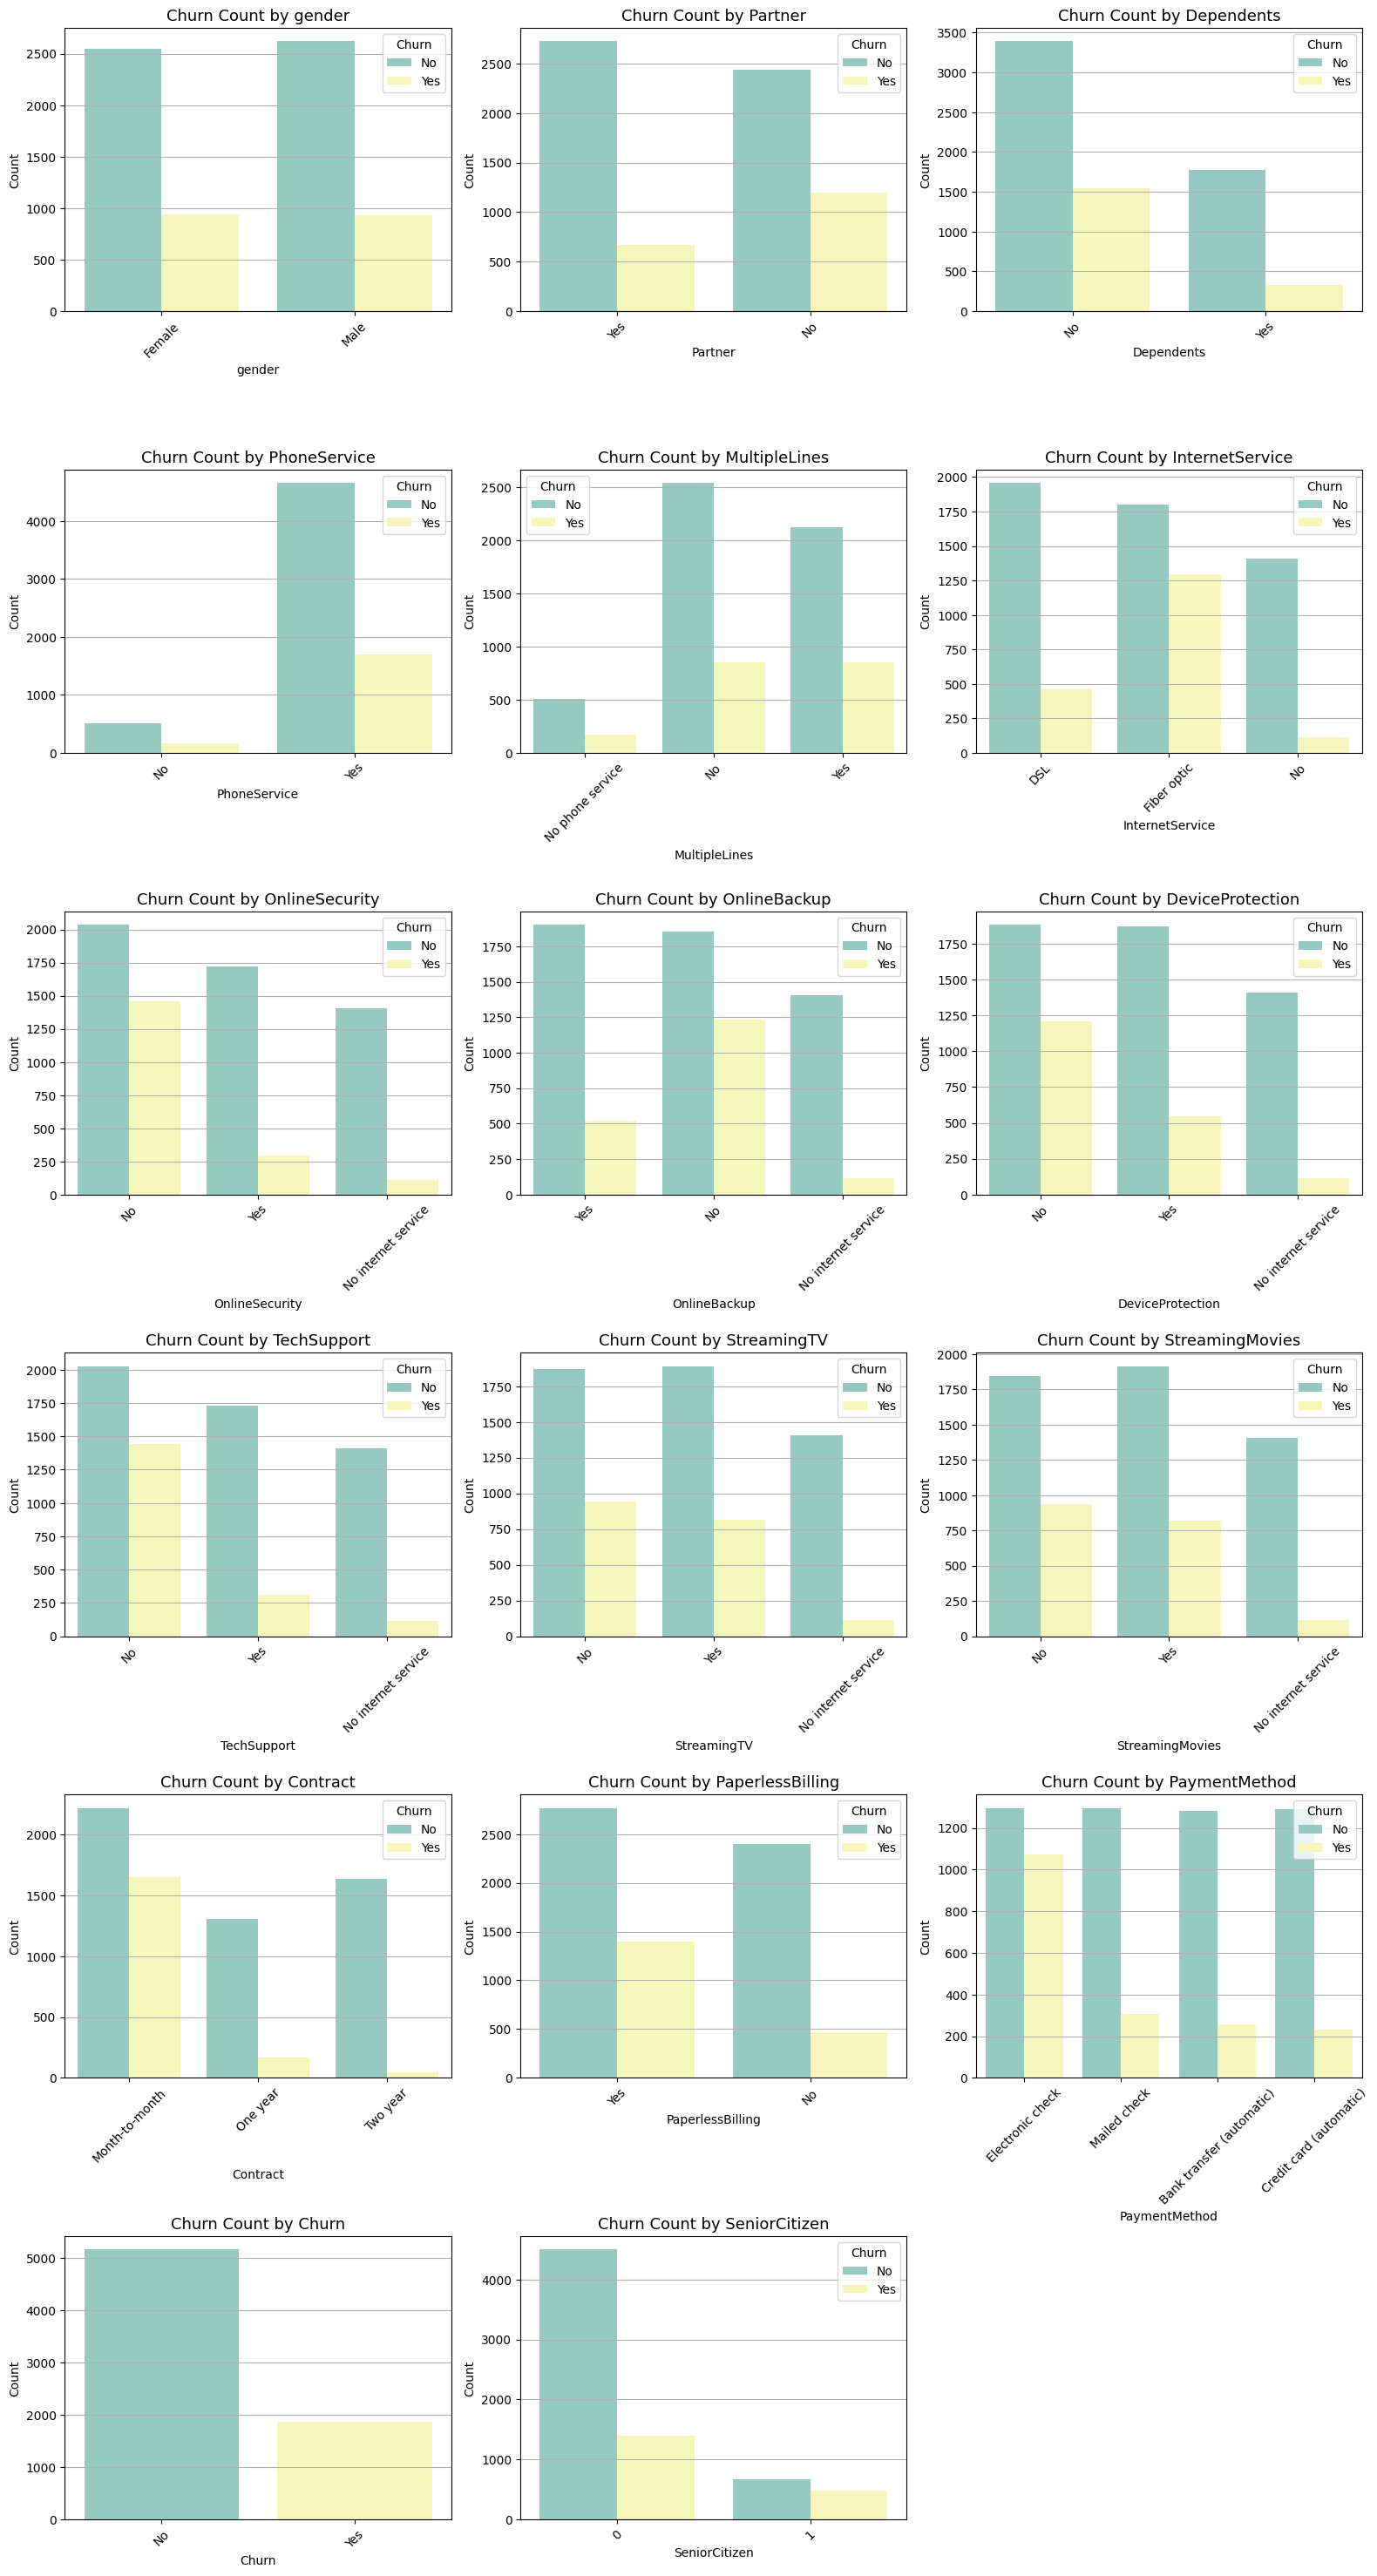

In [21]:
categorical_cols=df.select_dtypes(include=['object','category']).columns.tolist()
if 'SeniorCitizen' in df.columns and 'SeniorCitizen' not in categorical_cols:
  categorical_cols.append('SeniorCitizen')
n=len(categorical_cols)
cols=3
rows=(n+cols-1)
fig,axes=plt.subplots(rows,cols,figsize=(16,5 *rows))
axes=axes.flatten()
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='Set3')
    axes[i].set_title(f'Churn Count by {col}', fontsize=13)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##🔍General Observations:
Gender: Churn rate is almost equal for males and females — gender doesn’t seem to be a strong predictor of churn.

Partner & Dependents:

Customers without a partner or dependents are more likely to churn.

This suggests that individual customers may have lower loyalty compared to those with family responsibilities.

PhoneService & MultipleLines:

No clear difference in churn rate based on these services — having multiple lines doesn’t strongly impact churn.

InternetService & Online Services:

Customers using Fiber optic internet churn more than those using DSL.

Those without OnlineSecurity, Backup, or TechSupport show higher churn — indicating the value of these services in retention.

Streaming Services:

StreamingTV and StreamingMovies users have slightly higher churn, but it's not a major factor.

Contract Type:

Customers with Month-to-month contracts churn much more than those with One or Two year contracts.

This is one of the strongest indicators of churn.

PaperlessBilling:

Customers with paperless billing churn more — possibly linked with monthly contracts and online payments.

PaymentMethod:

Customers using Electronic check have the highest churn rate, which might indicate dissatisfaction or lower engagement.

SeniorCitizen:

Seniors (value = 1) have slightly higher churn, but not as significant as contract type or internet service.

In [29]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100


Churn,No,Yes
SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


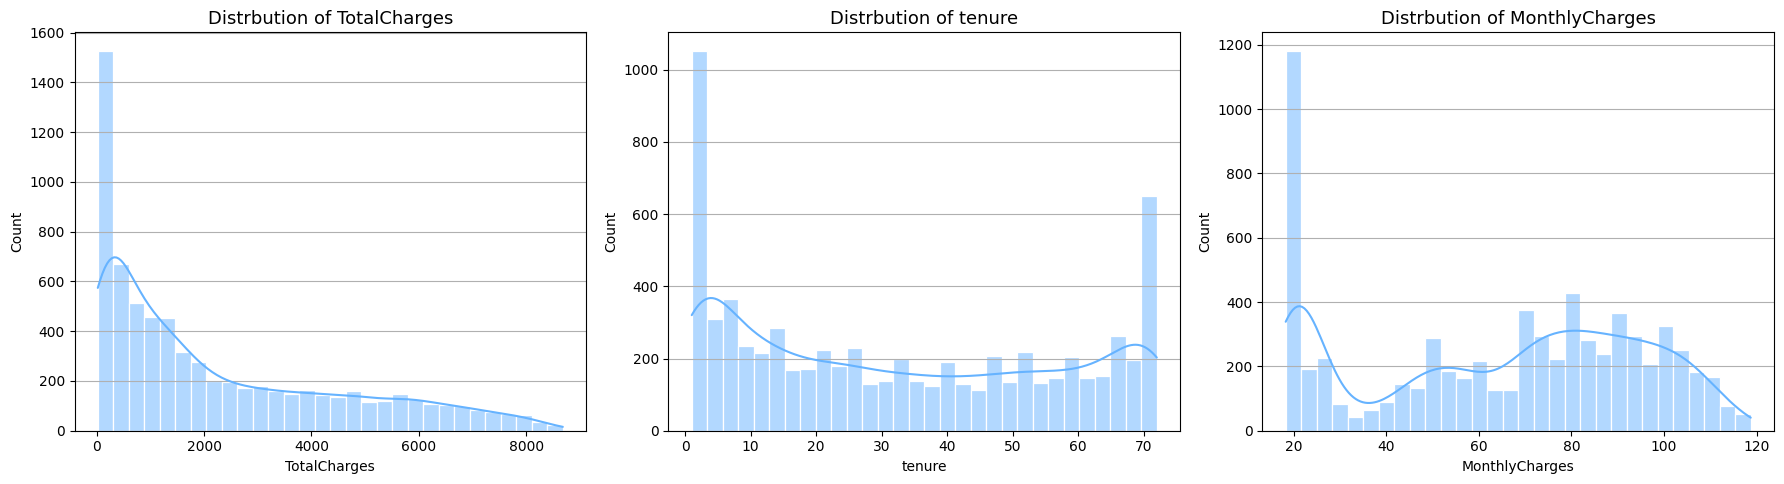

In [22]:
numerical_cols=['TotalCharges','tenure','MonthlyCharges']

fig,axes=plt.subplots(1,3,figsize=(18,5))
sns.set(style='whitegrid')

for i,col in enumerate(numerical_cols):
  sns.histplot(data=df[col], kde=True,bins=30, ax=axes[i], color='#66b3ff')
  axes[i].set_title(f'Distrbution of {col}', fontsize=13)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')
  axes[i].grid(True,axis='y')
plt.tight_layout()
plt.show()



### 📊 Distribution Analysis: TotalCharges, Tenure, and MonthlyCharges

From the visualizations, we can observe the following insights:

- **TotalCharges**: The distribution is right-skewed, indicating that most customers have relatively low total charges. This suggests a large portion of customers are either new or have not accumulated high usage charges.
  
- **Tenure**: The tenure distribution shows spikes at the beginning and the end. This indicates a significant number of very new customers (low tenure) and many long-term loyal customers (high tenure), with fewer in the middle range.
  
- **MonthlyCharges**: The distribution appears bimodal, with peaks around the lower and middle ranges. This implies that customers tend to fall into two main groups — those with basic/low-cost plans and those with higher service usage or more premium plans.

These patterns can be valuable in understanding customer segments and behavior, which is crucial for targeted retention strategies and churn prediction.

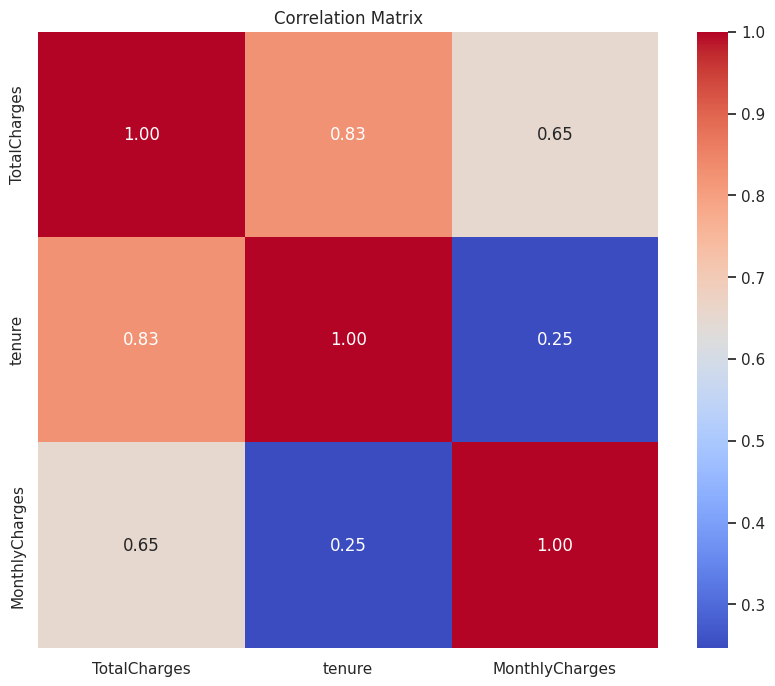

In [23]:
numerical_cols=['TotalCharges','tenure','MonthlyCharges']

correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



### 🔗 Correlation Matrix Insights

From the correlation matrix, we observe the following relationships among the numerical features:

- **TotalCharges and Tenure** have a **strong positive correlation (0.83)**. This makes sense, as the longer a customer stays, the more they are likely to be charged in total over time.
  
- **TotalCharges and MonthlyCharges** show a **moderate positive correlation (0.65)**, indicating that higher monthly charges often contribute to higher total charges, but the relationship isn't perfect due to differences in customer tenure.
  
- **Tenure and MonthlyCharges** have a **weak correlation (0.25)**. This implies that monthly charges are relatively independent of how long a customer has stayed. Customers can have high or low monthly charges regardless of their tenure.

These correlations help us understand customer billing behavior and are useful for modeling, particularly in predicting customer lifetime value or churn.

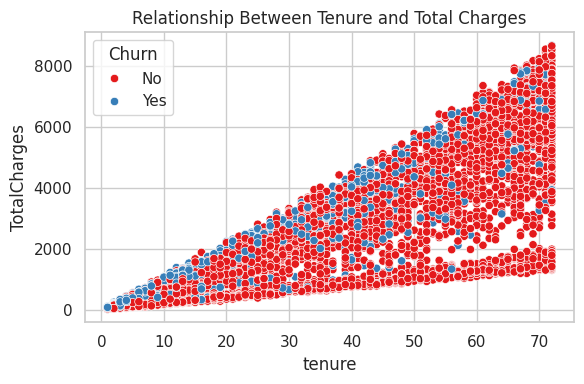

In [24]:
# رسم العلاقة بين tenure و TotalCharges
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn', palette='Set1')
plt.title('Relationship Between Tenure and Total Charges')
plt.tight_layout()
plt.show()


### 📈 Relationship Between Tenure and Total Charges (with Churn)

This scatter plot illustrates the relationship between **customer tenure** and **total charges**, color-coded by churn status:

- As expected, **TotalCharges increases with tenure**, forming a triangular distribution due to variation in MonthlyCharges.
- **Churned customers (blue)** are mostly concentrated in the **lower tenure and lower total charges** region, suggesting that many customers who leave the service do so early, before accumulating high charges.
- **Non-churned customers (red)** are spread across the full range of tenure and charges, with a large cluster in the high-tenure and high-total charge region.
  
This pattern indicates that **longer-tenured customers are less likely to churn**, supporting the earlier correlation analysis. This insight can be useful for churn prediction and targeting retention efforts on early-stage customers.

/tmp/ipython-input-25-275946423.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')


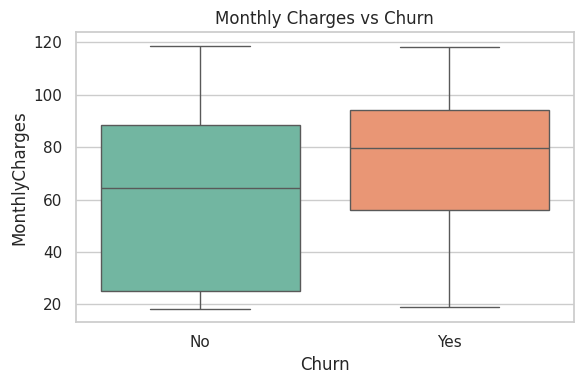

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.tight_layout()
plt.show()


##Monthly Charges vs. Churn (Boxplot Analysis)

This boxplot compares the **distribution of Monthly Charges** for customers who **churned** and those who **did not**:

- Customers who **churned** generally have **higher Monthly Charges**, with a higher median and more outliers on the upper end.
- Non-churned customers have a **wider spread** in Monthly Charges but tend to have **lower medians** overall.
- This suggests a possible link between **higher monthly costs and likelihood of churn**, potentially due to dissatisfaction with pricing or service value at higher tiers.

This visualization reinforces the importance of monitoring pricing models and tailoring retention strategies for high-paying customers.

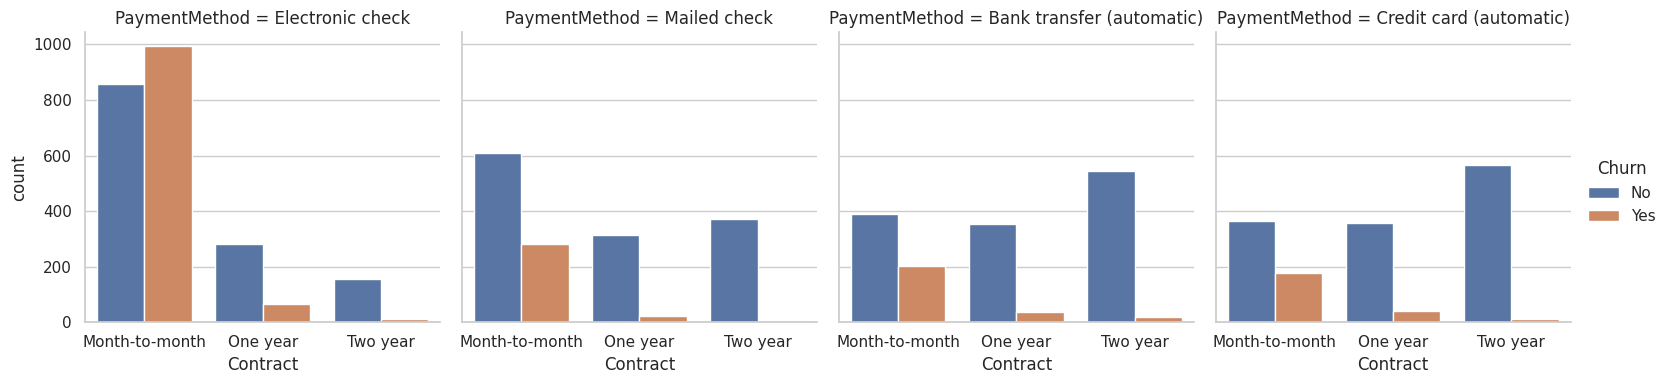

In [26]:
sns.catplot(data=df, x='Contract', hue='Churn', col='PaymentMethod', kind='count', height=4)
plt.show()

The charts show that customers on month-to-month contracts using 'Electronic check' as their payment method have a significantly higher churn rate compared to any other combination. In general, customers with longer contract terms (One year or Two year) exhibit very low churn rates across all payment methods.

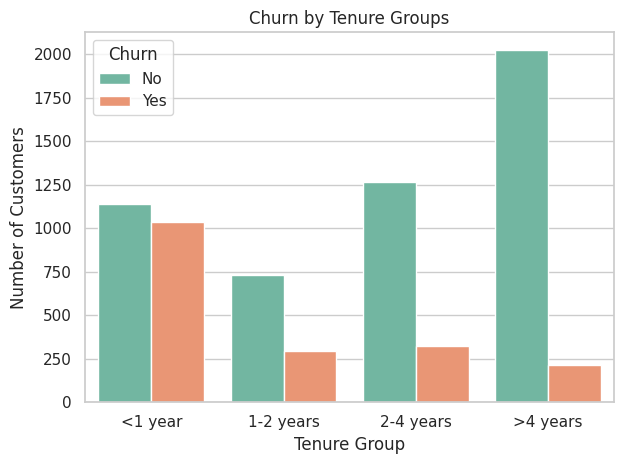

In [30]:
# Define bins and labels for tenure groups
bins = [0, 12, 24, 48, 72]
labels = ['<1 year', '1-2 years', '2-4 years', '>4 years']

# Create a new column with the tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

# Plot Churn by Tenure Group
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='TenureGroup', hue='Churn', palette='Set2')
plt.title('Churn by Tenure Groups')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


This chart clearly shows that customer churn decreases significantly as tenure increases. New customers (less than 1 year tenure) have the highest churn rate, while those with over 4 years of tenure exhibit the lowest churn

### 💡 Key Insights from the Data

After exploring and analyzing the dataset, the following key insights were discovered:

1. **Churned Customers Tend to Have Higher Monthly Charges**  
   - The boxplot showed that customers who churned often pay more per month than those who stay. This may indicate dissatisfaction with expensive plans.

2. **Churn is Common Among New Customers**  
   - Scatter plots of `Tenure` vs `TotalCharges` revealed that customers with low tenure (new users) are more likely to churn early in their subscription.

3. **Long-Term Customers Are More Loyal**  
   - There is a strong positive correlation (0.83) between `Tenure` and `TotalCharges`, suggesting that long-term customers contribute significantly to revenue and are less likely to churn.

4. **Monthly Charges and Total Charges Are Moderately Related**  
   - A moderate correlation (0.65) exists between `MonthlyCharges` and `TotalCharges`, since total charge depends both on how much customers pay and how long they stay.

5. **Churn Is Not Strongly Related to Tenure Alone**  
   - While low tenure is associated with high churn, tenure by itself is not a perfect predictor—some short-term customers still stay, and some long-term customers leave.


### ✅ Actionable Plan Based on Data Insights

Based on the insights derived from the customer churn dataset, here is an actionable plan to reduce churn and improve customer retention:

---

#### 1. **Target High Monthly Charge Customers**
- **Action**: Offer discounts or customizable plans for customers paying high monthly charges.
- **Why**: These users are more likely to churn, so proactive engagement can reduce risk.

---

#### 2. **Focus on Early Tenure Users**
- **Action**: Implement onboarding programs, check-in calls, or satisfaction surveys within the first 1–3 months.
- **Why**: New customers (low tenure) are at the highest risk of churn.

---

#### 3. **Reward Long-Term Customers**
- **Action**: Launch loyalty rewards, exclusive deals, or personalized upgrades for customers with high tenure.
- **Why**: They contribute more revenue and are less likely to churn—keep them happy and engaged.

---

#### 4. **Monitor Pricing Sensitivity**
- **Action**: Run A/B testing on pricing structures and bundle offers to identify more churn-resistant pricing models.
- **Why**: High MonthlyCharges is a churn factor. Testing can find optimal price points.

---

#### 5. **Predictive Churn Modeling**
- **Action**: Train a classification model using the cleaned and preprocessed dataset to predict churn.
- **Why**: Early prediction allows the business to intervene and retain customers before they leave.

---

#### 6. **Segment Customers for Targeted Retention**
- **Action**: Use clustering or segmentation (e.g., by tenure, charges, contract type) to create targeted retention campaigns.
- **Why**: Tailored strategies are more effective than one-size-fits-all communication.

---

#### 7. **Continuous Monitoring & Feedback Loop**
- **Action**: Build dashboards to track churn KPIs regularly and gather customer feedback.
- **Why**: Continuous improvement is key to adapting strategies and reducing churn over time

#**Building and Evaluating Models**



Step1:Feature Engineering and Dataset Splitting


In [34]:
# Encoding the target variable 'Churn' as binary: Yes → 1, No → 0
df['Churn']=df['Churn'].map({"Yes":1,"No":0})

In [38]:
obj_cols=df.select_dtypes(include='object').columns

In [39]:
obj_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [42]:
# Encoding all categorical features using LabelEncoder and storing the encoders for future use
cols_encoder={}
for col_name in obj_cols:
  labelEncoder=LabelEncoder()
  df[col_name]=labelEncoder.fit_transform(df[col_name])
  cols_encoder[col_name]=labelEncoder

In [48]:
# Saving all label encoders to a pickle file for future use (e.g., transforming new/unseen data)
file_path='label_encoders.pkl'
encoder_file=open(file_path,'wb')
pickle.dump(cols_encoder,encoder_file)
encoder_file.close()

In [50]:
# Scaling numerical features using StandardScaler to normalize their distribution
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [72]:
# Defining features (X) and target variable (y); dropping 'Churn' and 'TenureGroup' from features
x=df.drop(['Churn','TenureGroup'],axis=1)
y=df['Churn']

In [74]:
# Splitting the dataset into training and testing sets (80% train, 20% test) and checking class distribution in y_train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [76]:
# Applying ADASYN to balance the training set by generating synthetic samples for the minority class
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(x_train, y_train)

In [77]:
y_train_resampled.value_counts()

,count
Churn,
1,4184
0,4130


#**Model Selection: Comparing Multiple Classifiers**

In [82]:
# Defining a dictionary of machine learning models to compare for churn prediction
models={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}


In [83]:
# Defining hyperparameter grids for each model to be used in grid search for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'iterations': [100, 200],
        'depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1],
    }
}


In [112]:
# Tuning each model using GridSearchCV and storing the best estimators
best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train_resampled, y_train_resampled)

    best_models[model_name] = grid.best_estimator_

    print(f"Best Parameters: {grid.best_params_}")
    print(f"Best Accuracy: {grid.best_score_:.4f}\n")


Tuning Logistic Regression...
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Accuracy: 0.7588

Tuning Random Forest...
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8221

Tuning XGBoost...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best Accuracy: 0.8155

Tuning CatBoost...
Best Parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
Best Accuracy: 0.8186



**Conclusion**:  
The **Random Forest model** stands out as the best performer in terms of accuracy. However, CatBoost and XGBoost are competitive and may offer better performance in real-world scenarios with fine-tuning and more features. Logistic Regression is still valuable for understanding feature importance and fast deployment.

In [92]:
joblib.dump(best_models['Random Forest'], 'best_random_forest_model.pkl')
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_name = 'Random Forest'
model = best_models[model_name]

print(f"\nModel: {model_name}")

# Predict
y_pred = model.predict(x_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Model: Random Forest
Accuracy: 0.7512
Confusion Matrix:
[[813 220]
 [130 244]]


#**✅Final Conclusion & Next Steps**

After conducting a thorough exploratory data analysis, preprocessing the data, and training multiple machine learning models, we can conclude the following:

- **Random Forest** achieved the best performance with 82.2% accuracy after tuning.
- **CatBoost** and **XGBoost** also performed strongly and can be considered as alternative models.
- Key drivers of churn include **high monthly charges** and **low customer tenure**.

### 📌 Business Recommendations:
- Focus on **early retention strategies** for new customers.
- Provide **better value offers or flexible plans** for high-paying customers.
- Monitor churn risk using the deployed model and take proactive actions.